# Análisis de datasets de noticias

In [18]:
import os
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
from glob import glob
from tqdm import tqdm
import re
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Comparamos los articulos de las distintas categorias

In [23]:
path_, filename_, category_, article_or_summary_,content_ = [],[],[],[],[]
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        path = os.path.join(dirname, filename).replace("\\","/")
        f = open(os.path.join(dirname, filename),"r")
        try:
            content_.append(str(f.read()))
            path_.append(path)
            filename_.append(filename)
            category_.append(path.split("/")[-2])
            article_or_summary_.append(path.split("/")[-3])
        except:
            print("ERROR ABRIENDO EL FICHERO")
        

ERROR ABRIENDO EL FICHERO


In [24]:
df = pd.DataFrame({"path":path_, "filename":filename_, "category":category_, "article_or_summary":article_or_summary_,"content":content_}, columns=["path", "filename", "category", "article_or_summary","content"])
df

,path,filename,category,article_or_summary,content
0,data/Articles/business/001.txt,001.txt,business,Articles,Ad sales boost Time Warner profit\n\nQuarterly...
1,data/Articles/business/002.txt,002.txt,business,Articles,Dollar gains on Greenspan speech\n\nThe dollar...
2,data/Articles/business/003.txt,003.txt,business,Articles,Yukos unit buyer faces loan claim\n\nThe owner...
3,data/Articles/business/004.txt,004.txt,business,Articles,High fuel prices hit BA's profits\n\nBritish A...
4,data/Articles/business/005.txt,005.txt,business,Articles,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...,...,...,...
4444,data/Summaries/tech/397.txt,397.txt,tech,Summaries,BT is introducing two initiatives to help beat...
4445,data/Summaries/tech/398.txt,398.txt,tech,Summaries,A third of them read unsolicited junk e-mail a...
4446,data/Summaries/tech/399.txt,399.txt,tech,Summaries,This goes to the heart of the European project...
4447,data/Summaries/tech/400.txt,400.txt,tech,Summaries,Amit Yoran was director of the National Cyber ...


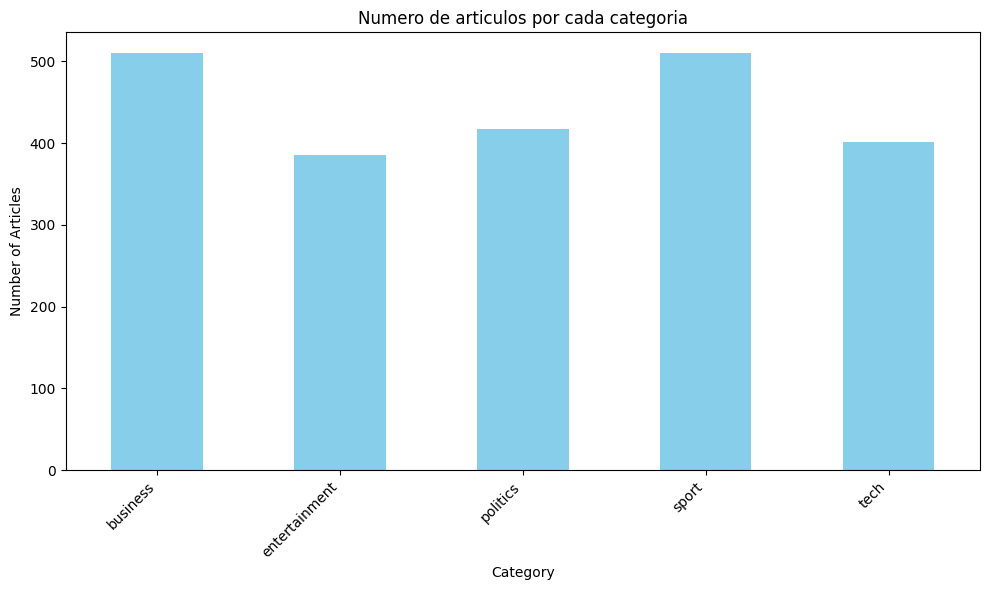

In [25]:
category_counts = df[df["article_or_summary"]=="Articles"].groupby('category').size()

# Plot a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Numero de articulos por cada categoria')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
categories = ["business","entertainment","politics","sport","tech"]
articles_cat = {}
for category in categories:
    abs_filepaths = glob(f"data/Articles/{category}/*.txt")
    # Read it and store it in a list
    news_articles = ""

    for abs_filepath in tqdm(abs_filepaths, colour='yellow'):
        try:
            # Open the file
            f = open(abs_filepath,"r")
            category_.append(path.split("/")[-2])
            # Read the contents of the file
            article = str(f.read())
            article = article.replace("\\n",'')
            # Remove all excepth the alphabets
            article = re.sub("[^a-zA-Z0-9]",' ', article)
            
            # Lower all the aplhabets
            article = article.lower()
            news_articles = " ".join([news_articles, article])
        except:
            print("ERROR ABRIENDO EL FICHERO")
    words = news_articles.split()
    articles_cat[category] = (news_articles,int(len(words)/len(abs_filepaths)))

100%|██████████| 511/511 [00:00<00:00, 3469.92it/s]


ERROR ABRIENDO EL FICHERO


100%|██████████| 401/401 [00:00<00:00, 1855.65it/s]


In [7]:
avg_sizes = ([value[1] for value in articles_cat.values()])
sc_avg_sizes = ([value[1]/4 for value in articles_cat.values()])
# Create the plot
p = figure(x_range=categories, height=350, title="Número de palabras medio de las noticias por categoria",
           toolbar_location=None, tools="")

# Add circles to the plot
p.circle(x=categories, y=0, size=sc_avg_sizes, color=Category10[5], alpha=0.6)

# Add category labels
p.text(x=categories, y=0, text_align='center', text_baseline='middle',
       text_font_size='10pt')

p.text(x=categories, y=0, text=avg_sizes, text_align='center', text_baseline='middle',
       text_font_size='8pt', text_color='black')

# Remove gridlines
p.grid.grid_line_color = None
p.x_range.range_padding = 0.2
# Set axis labels
p.xaxis.axis_label = "Categories"
p.yaxis.visible = False

output_notebook()
show(p)

Loading BokehJS ...

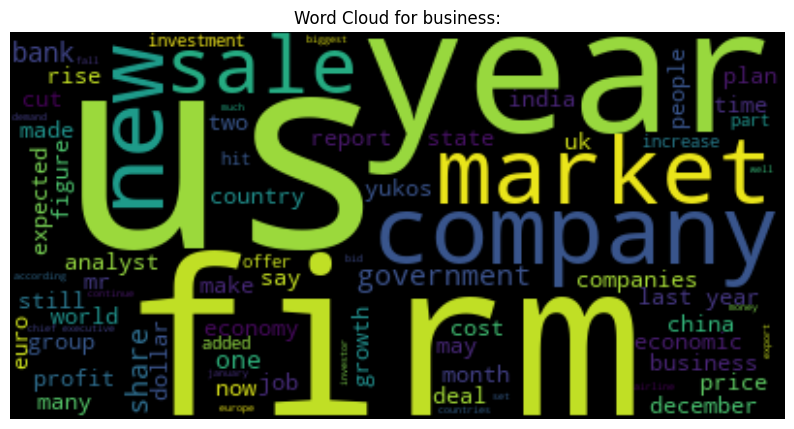

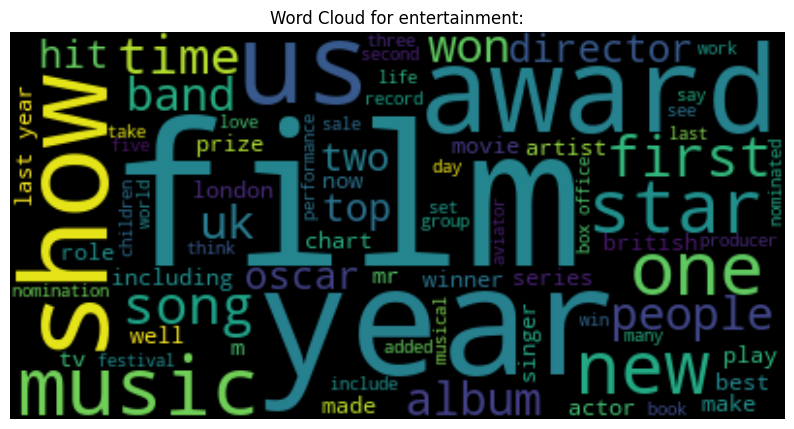

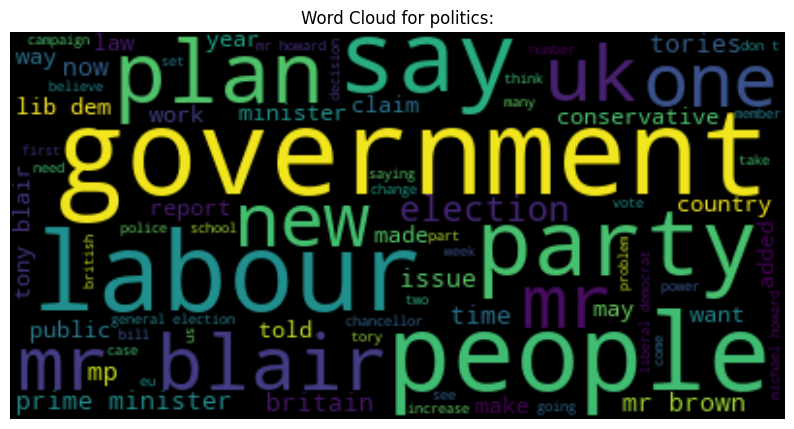

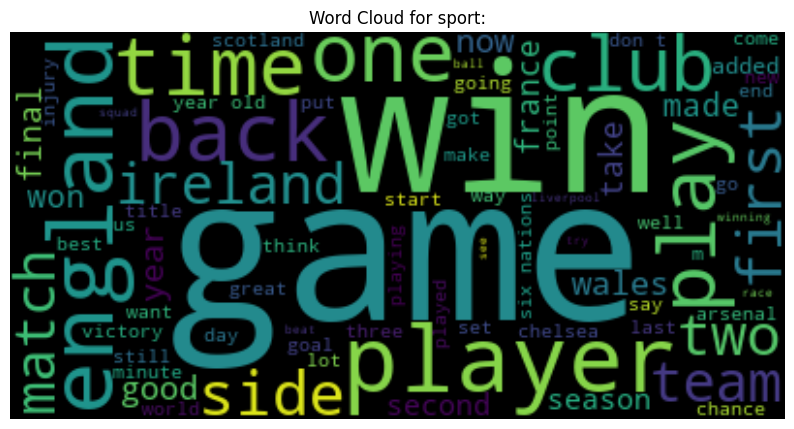

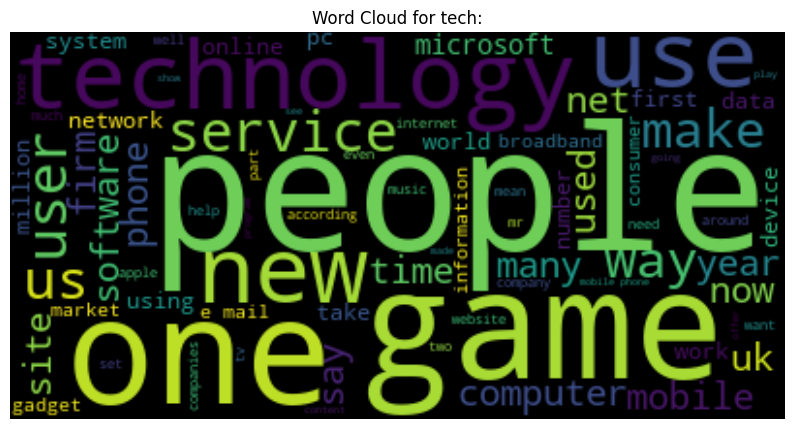

In [16]:
stop_words = ["will", "said", "s","u"] + list(STOPWORDS)
for category, (article, _) in articles_cat.items():
    # Generate word cloud for the article
    wordcloud = WordCloud(stopwords=stop_words,max_words = 75).generate(article)
    
    # Display the generated image
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category}")
    plt.axis("off")
    plt.show()

## 2. Buscar articulos por palabras clave usando TF-IDF

In [26]:
# Calculamos primero la matriz de TF-IDF
text_content = df['content']
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [27]:
def search(tfidf_matrix,model,request, top_n = 5):
    request_transform = model.transform([request])
    similarity = np.dot(request_transform,np.transpose(tfidf_matrix))
    x = np.array(similarity.toarray()[0])
    indices=np.argsort(x)[-5:][::-1]
    return indices

In [36]:
pd.set_option('display.max_colwidth', None)
request = 'Madrid Ronaldo euro'
result = search(tfidf,vector, request, top_n = 5)
df.loc[result][["category","content"]]

,category,content
3690,sport,"""I'm happy Madrid is interested in me because it has always been my dream since I was little to play there.""Jose Antonio Reyes has added to speculation linking him with a move from Arsenal to Real Madrid after falling victim to a radio prank.""I have seen the stories in the media linking me with Real Madrid,"" he had said on Thursday lunchtime.""I wish I was playing for Real Madrid,"" the 21-year-old told Cadena Cope.""If I'm not (playing for Real) I'm going to have to carry on playing with some bad people,"" he added.The Spaniard believed he was talking to Real Madrid sporting director Emilio Butragueno when he allegedly berated his team-mates as ""bad people"".I love the way Madrid play.I'm not happy with the way things are."""
2599,business,"Against the yen the dollar was trading down at $103.05.The US dollar has hit a new record low against the euro and analysts predict that more declines are likely in 2005.The dollar slid to a record $1.3666 versus the euro on Thursday, before bouncing back to $1.3636.Disappointing economic reports dented the currency, which had been rallying after European policy makers said they were worried about the euro's strength.The yen, meanwhile, dropped to 141.60 per euro in afternoon trading.Mr Berlusconi said the euro's strength was ""absolutely worrying"" for Italian exports.Earlier on Thursday, the Japanese yen touched its lowest versus the euro on concerns about economic growth in Asia."
1410,sport,"Ronaldo considering new contract\n\nManchester United winger Cristiano Ronaldo said he is close to agreeing to a new contract at Old Trafford.\n\nThe Portugal star, who joined in August 2003 on a five-year-deal, is a regular in the United first-team. ""The United board have already made an offer to renew the contract but I'm trying not to think about it,"" he told the News of the World. ""My agent has spoken with the club and it will be resolved soon. I think we'll reach a good agreement for both sides."" Ronaldo refused to commit his long-term future to the club.\n\n""Nobody knows what will come tomorrow. I like being here, but who knows,"" he added. ""There aren't many bigger and better clubs than this one. It's my ambition to be at a big club. I'm happy but nobody knows the future.""\n"
3776,sport,"United sensed a chance to finish the tie as a contest early on and Ronaldo blazed over before Jones saved well from Scholes and then Rooney.Ronaldo 9, Rooney 87.United boss Sir Alex Ferguson was taking few chances after their 0-0 draw in the first game and he handed starts to Paul Scholes and Ryan as well as Ronaldo and Rooney.United wasted a host of chances to make it safe as Jones made some great saves, but Wayne Rooney put the tie beyond doubt late on with a cool finish.In stoppage time Exeter created their best chance as Alex Jeannin swung in a cross from the left that Devine managed to flick goalwards, but the ball flew wide of Howard's goal.Exeter had chances of their own, Sean Devine twice volleying wide and Andrew Taylor forcing Tim Howard to save.Jones, Hiley, Sawyer, Gaia, Jeannin, Moxey, Taylor (Martin 89), Ampadu (Afful 69), Clay, Flack (Edwards 74), Devine.Cristiano Ronaldo scored the opener, slipping the ball between Paul Jones' legs after just nine minutes.Scholes played a lovely pass in to Ronaldo on the left-hand side of the six-yard box and the Portuguese winger slid the ball between the legs of Jones to open the scoring.Howard, Phil Neville, Gary Neville, O'Shea, Fortune, Giggs (Saha 70), Miller (Fletcher 66), Scholes, Djemba-Djemba (Silvestre 80), Ronaldo, Rooney."
2573,business,"The US dollar has continued its record-breaking slide and has tumbled to a new low against the euro.The US is struggling with a ballooning trade deficit and analysts said one of the easiest ways to fund it was by allowing a depreciation of the dollar.The dollar has weakened sharply since September when it traded about $1.20 against the euro.The US currency was trading at 